In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt

import thalesians.tsa.processes as proc
import thalesians.tsa.random as rnd
import thalesians.tsa.simulation as sim

In [4]:
rnd.randomstate(np.random.RandomState(seed=42), force=True);

In [5]:
W = proc.WienerProcess.create2d(mean1=.25, mean2=.5, sd1=3., sd2=4., cor=.5)
em = sim.EulerMaruyama(process=W)

In [6]:
df = sim.run(em, 100)

In [7]:
isinstance(W, proc.MarkovProcess)

True

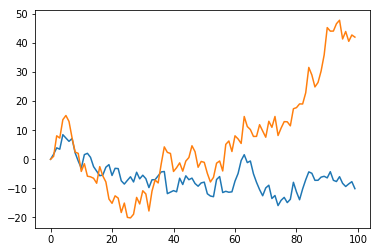

In [8]:
plt.plot(df);

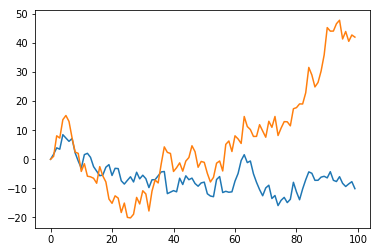

In [9]:
rnd.randomstate(np.random.RandomState(seed=42), force=True);
x = [0., 0.]
ts = [0.]; xs = [x]
for t, v in zip(sim.xtimes(1., 100., 1.), rnd.multivatiate_normals(ndim=2)):
    x = W.propagate(t, v, max(0, t-1), x)
    ts.append(t); xs.append(x.flatten())
plt.plot(ts, xs);

In [ ]:
df[0:10]

In [ ]:
next(em)

In [ ]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v)
    if t == 110: break
ts, vs

In [ ]:
plt.plot(ts, np.hstack(vs).T);

In [ ]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v.flatten())
    if t == 120: break
ts, vs

In [ ]:
plt.plot(ts, vs);

In [ ]:
ts = sim.xtimes(dt.datetime(2017, 5, 1), dt.datetime(2017, 6, 1), dt.timedelta(hours=12))
em = sim.EulerMaruyama(process=W, times=ts, timeunit=dt.timedelta(days=1.), flatten=True)
next(em)

In [ ]:
next(em)

In [ ]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v)
plt.plot(ts, vs);

In [ ]:
X = proc.OrnsteinUhlenbeckProcess(transition=1., vol=1.)

In [ ]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-5))
df = sim.run(em)
plt.plot(df);

In [ ]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-3))
df = sim.run(em)
plt.plot(df);

In [ ]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-2))
df = sim.run(em)
plt.plot(df);

In [ ]:
list(sim.xtimes(start=dt.datetime(2017, 6, 1), stop=dt.datetime(2017, 6, 10), step=lambda t: rnd.exponential(dt.timedelta(hours=12))))

In [ ]:
list(sim.xtimes(start=dt.datetime(2017, 6, 1), stop=dt.datetime(2017, 6, 10), step=lambda t: rnd.exponential(dt.timedelta(hours=12))))